### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data_copy = data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [5]:
def show_missing_values(data):
  # Calculate missing values count and percentage
  missing_values = data.isna().sum()
  missing_percentage = (missing_values / len(data)) * 100

  # Create a DataFrame with both raw count and percentage
  missing_data_summary = pd.DataFrame({
      "Missing Count": missing_values,
      "Missing Percentage": missing_percentage
  })

  # Filter to show only columns with missing values
  missing_data_summary = missing_data_summary[missing_data_summary["Missing Count"] > 0]

  # Display the result
  print(missing_data_summary)

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
# drop car column. We have a copy of original data.
# 99% of data is missing for car, hence, lets drop car column
# Drop column direction_opp with low relevance
data.drop(['car', 'direction_opp'], axis=1, inplace=True)

In [8]:
# Remove rows with missing values in these key columns
behavioral_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data.dropna(subset=behavioral_cols, inplace=True)

In [9]:
# Combine time-to-coupon features into a single ordinal feature
def combine_time_to_coupon(row):
    if row['toCoupon_GEQ25min'] == 1:
        return '25min+'
    elif row['toCoupon_GEQ15min'] == 1:
        return '15-25min'
    elif row['toCoupon_GEQ5min'] == 1:
        return '5-15min'
    return '0-5min'

data['time_to_coupon'] = data.apply(combine_time_to_coupon, axis=1)
data.drop(['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'], axis=1, inplace=True)

In [10]:
missing_data = show_missing_values(data)
missing_data

Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


4. What proportion of the total observations chose to accept the coupon?



In [ ]:
# Calculate the percentage of observations kept
percentage_kept = (len(data) / len(data_copy)) * 100

print(f"Percentage of observations kept: {percentage_kept:.2f}%")

Percentage of observations kept: 95.23%


5. Use a bar plot to visualize the `coupon` column.

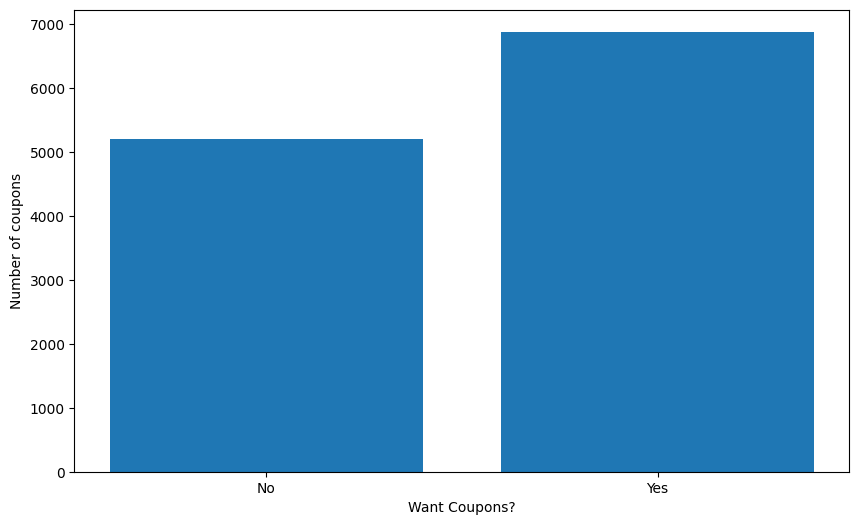

In [ ]:
import matplotlib.pyplot as plt

platform_counts = data['Y'].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(platform_counts.index, platform_counts.values)

plt.xlabel('Want Coupons?')
plt.ylabel('Number of coupons')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

6. Use a histogram to visualize the temperature column.

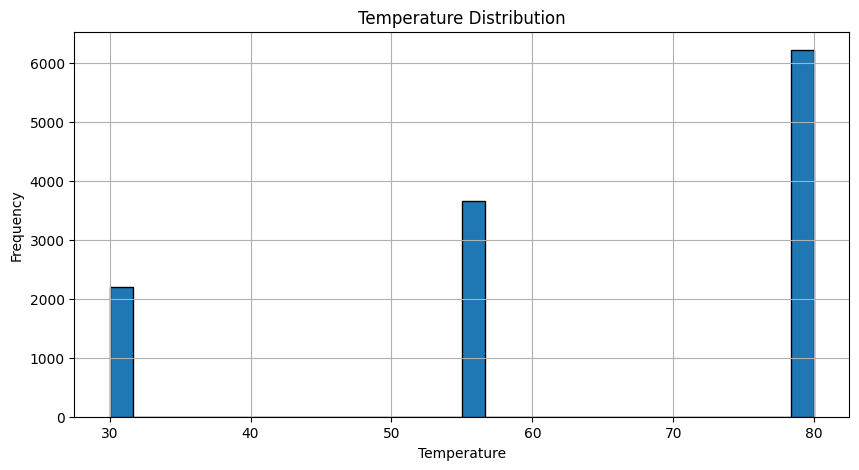

In [ ]:
data['temperature'].hist(bins=30, figsize=(10, 5), edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

In [40]:
bar_coupons = data[data['coupon'] == 'Bar']

In [41]:
bar_coupons['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

2. What proportion of bar coupons were accepted?


In [43]:
total_bar_coupons = float(len(bar_coupons))
bar_coupons_accepted = len(bar_coupons[bar_coupons['Y'] == 1])
bar_coupons_accepted_rate = bar_coupons_accepted / float(total_bar_coupons)

print(f"Proportion of bar coupons accepted: {bar_coupons_accepted_rate * 100:.2f}%")

Proportion of bar coupons accepted: 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [46]:
# Acceptance rate who went to bar 3 or fewer times
those_went_to_bar_3_or_fewer = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]
those_went_to_bar_more_than_3 = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]
group_more_than_3 = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]

acceptance_rate_3_or_fewer = len(those_went_to_bar_3_or_fewer[those_went_to_bar_3_or_fewer['Y'] == 1]) / float(total_bar_coupons)
acceptance_rate_more_than_3 = len(those_went_to_bar_more_than_3[those_went_to_bar_more_than_3['Y'] == 1]) / float(total_bar_coupons)
# acceptance_rate_more_than_3 = len(group_more_than_3[group_more_than_3['Y'] == 1]) / float(len(group_more_than_3)) if len(group_more_than_3) > 0 else 0

# Print comparison
print("Acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.")
print(f"Acceptance Rate (Bar ≤ 3x/month): {acceptance_rate_3_or_fewer * 100:.2f}%")
print(f"Acceptance Rate (Bar > 3x/month): {acceptance_rate_more_than_3 * 100:.2f}%")


Acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
Acceptance Rate (Bar ≤ 3x/month): 33.51%
Acceptance Rate (Bar > 3x/month): 7.68%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [47]:
bar_coupons.loc[:, 'age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')

# Drivers > 25 & Bar > 1x/month
control_group = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons['age'] > 25)
]

# Define the "all others" group: Everyone else
group_all_others = bar_coupons[~bar_coupons.index.isin(control_group.index)]  # Exclude control_group

# Compute acceptance rates safely
acceptance_rate_control_group = len(control_group[control_group['Y'] == 1]) / float(len(control_group))
acceptance_rate_all_others = len(group_all_others[group_all_others['Y'] == 1]) / float(len(group_all_others))

# Print comparison
print("Control group: Drivers who go to a bar more than once a month and are over the age of 25 to the all others.")
print(f"Acceptance Rate Control Group: {acceptance_rate_control_group * 100:.2f}%")
print(f"Acceptance Rate (All Others): {acceptance_rate_all_others * 100:.2f}%")

Control group: Drivers who go to a bar more than once a month and are over the age of 25 to the all others.
Acceptance Rate Control Group: 69.41%
Acceptance Rate (All Others): 35.09%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [48]:
control_group = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    ((bar_coupons['has_children'] != 1) & (bar_coupons['passanger'] != 'kid')) &
    (bar_coupons['occupation'] != 'Farming Fishing & Forestry')
]

# Define the "all others" group: Everyone else
group_all_others = bar_coupons[~bar_coupons.index.isin(control_group.index)]  # Exclude control_group

# Compute acceptance rates safely
acceptance_rate_control_group = len(control_group[control_group['Y'] == 1]) / float(len(control_group))
acceptance_rate_all_others = len(group_all_others[group_all_others['Y'] == 1]) / float(len(group_all_others))

# Print comparison
print("Control group: Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.")
print(f"Acceptance Rate Control Group: {acceptance_rate_control_group * 100:.2f}%")
print(f"Acceptance Rate (All Others): {acceptance_rate_all_others * 100:.2f}%")

Control group: Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
Acceptance Rate Control Group: 70.22%
Acceptance Rate (All Others): 33.44%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [49]:
bar_coupons.loc[:, 'age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')
target_group = bar_coupons[
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) & ((bar_coupons['has_children'] != 1) & (bar_coupons['passanger'] != 'kid')) & (bar_coupons['maritalStatus'] != 'Widowed')) |
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) & (bar_coupons['age'] < 30)) |
    (bar_coupons['RestaurantLessThan20'].isin(['1~3', '4~8', 'gt8']) & (bar_coupons['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])))
]

group_all_others = bar_coupons[~bar_coupons.index.isin(target_group.index)]

acceptance_rate_target = len(target_group[target_group['Y'] == 1]) / float(len(target_group))
acceptance_rate_all_others = len(group_all_others[group_all_others['Y'] == 1]) / float(len(group_all_others))

print("Target group: Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed OR go to bars more than once a month and are under the age of 30 OR go to cheap restaurants more than 4 times a month and income is less than 50K.")
print(f"Acceptance Rate (Target Group): {acceptance_rate_target * 100:.2f}%")
print(f"Acceptance Rate (All Others): {acceptance_rate_all_others * 100:.2f}%")

Target group: Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed OR go to bars more than once a month and are under the age of 30 OR go to cheap restaurants more than 4 times a month and income is less than 50K.
Acceptance Rate (Target Group): 48.58%
Acceptance Rate (All Others): 32.74%


*7*.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Here is my hypothesis (for bar coupons):**

Drivers who visit bars occasionally (≤3 times/month) are more likely to accept bar coupons (33.51%) compared to frequent bar-goers (7.68%). This suggests that occasional visitors may view the coupon as a special incentive, while regulars are less influenced.

Age also plays a role—drivers over 25 who visit bars more than once a month show a higher acceptance rate (69.41%), possibly because they have more disposable income or see value in social spending.

Drivers with adult passengers and occupations outside Farming, Fishing, or Forestry show a higher coupon acceptance rate (70.22%), suggesting that social contexts play a significant role in influencing coupon acceptance.

When combining lifestyle factors—such as frequent social outings (bars and cheap restaurants), younger age, and moderate incomes—the acceptance rate rises to 48.58%, compared to 32.74% for others. This suggests that socially active, cost-conscious drivers are the most likely to accept bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [12]:
data['coupon'].value_counts()

,count
coupon,
Coffee House,3816
Restaurant(<20),2653
Carry out & Take away,2280
Bar,1913
Restaurant(20-50),1417


**Lets try to analyze about Coffee House coupons**




In [21]:
coffee_coupons = data[data['coupon'] == 'Coffee House']

1. Time of Day vs. Coffee Coupon Acceptance
2. Passenger Type vs. Coffee Coupon Acceptance
3. Distance to Coupon vs. Coffee Coupon Acceptance
4. Weather Conditions vs. Coffee Coupon Acceptance

1. What proportion of Coffee Coupons were accepted?

In [22]:
total_coffee_coupons = float(len(coffee_coupons))
coffee_coupons_accepted = len(coffee_coupons[coffee_coupons['Y'] == 1])
coffee_coupons_accepted_rate = coffee_coupons_accepted / float(total_coffee_coupons)

print(f"Proportion of coffee coupons accepted: {coffee_coupons_accepted_rate * 100:.2f}%")

Proportion of coffee coupons accepted: 49.63%


2. Compare the acceptance rate between different times of the day.

In [23]:
coffee_coupons['time'].unique()

array(['10AM', '2PM', '6PM', '7AM', '10PM'], dtype=object)

In [32]:
"""
coffee_coupons_7am = coffee_coupons[coffee_coupons['time'] == '7AM']
coffee_coupons_10am = coffee_coupons[coffee_coupons['time'] == '10AM']
coffee_coupons_2pm = coffee_coupons[coffee_coupons['time'] == '2PM']
coffee_coupons_6pm = coffee_coupons[coffee_coupons['time'] == '6PM']
coffee_coupons_10pm = coffee_coupons[coffee_coupons['time'] == '10PM']

acceptance_rate_7am = len(coffee_coupons_7am[coffee_coupons_7am['Y'] == 1]) / float(len(coffee_coupons_7am))
print(f"Proportion of coffee coupons accepted at 7am: {acceptance_rate_7am * 100:.2f}%")
"""

# Define time categories
time_categories = ['7AM', '10AM', '2PM', '6PM', '10PM']

# Compute and print acceptance rates for each time category
for time in time_categories:
    coffee_time_df = coffee_coupons[coffee_coupons['time'] == time]
    if len(coffee_time_df) > 0:
        acceptance_rate = len(coffee_time_df[coffee_time_df['Y'] == 1]) / float(len(coffee_time_df))
        print(f"Proportion of coffee coupons accepted at {time}: {acceptance_rate * 100:.2f}%")



Proportion of coffee coupons accepted at 7AM: 44.00%
Proportion of coffee coupons accepted at 10AM: 63.48%
Proportion of coffee coupons accepted at 2PM: 54.55%
Proportion of coffee coupons accepted at 6PM: 41.23%
Proportion of coffee coupons accepted at 10PM: 42.91%


Coffee house coupons acceptance rate was higher at 10 am and next higher as 2 pm

3. Lets analyze - distance to Coupon vs. Coffee Coupon Acceptance

In [36]:
coffee_coupons['time_to_coupon'].unique()

array(['5-15min', '15-25min', '25min+'], dtype=object)

In [35]:
# Define time to coupon categories
time_to_coupon_categories = ['5-15min', '15-25min', '25min+']

# Compute and print acceptance rates for each time category
for time_to in time_to_coupon_categories:
    coffee_time_to_coupon_df = coffee_coupons[coffee_coupons['time_to_coupon'] == time_to]
    if len(coffee_time_to_coupon_df) > 0:
        acceptance_rate = len(coffee_time_to_coupon_df[coffee_time_to_coupon_df['Y'] == 1]) / float(len(coffee_time_to_coupon_df))
        print(f"Proportion of coffee coupons accepted at {time_to}: {acceptance_rate * 100:.2f}%")

Proportion of coffee coupons accepted at 5-15min: 54.53%
Proportion of coffee coupons accepted at 15-25min: 47.03%
Proportion of coffee coupons accepted at 25min+: 34.23%


As expected, the coffee coupons acceptance rate was higher for when distance to coffee house is lower i.e 5-15 min


4. Lets analyze: Weather Conditions vs. Coffee Coupon Acceptance

In [37]:
coffee_coupons['weather'].unique()

array(['Sunny', 'Rainy', 'Snowy'], dtype=object)

In [38]:
# Define time to coupon categories
weather_categories = ['Sunny', 'Rainy', 'Snowy']

# Compute and print acceptance rates for each time category
for weather in weather_categories:
    weather_df = coffee_coupons[coffee_coupons['weather'] == weather]
    if len(weather_df) > 0:
        acceptance_rate = len(weather_df[weather_df['Y'] == 1]) / float(len(weather_df))
        print(f"Proportion of coffee coupons accepted at {weather}: {acceptance_rate * 100:.2f}%")

Proportion of coffee coupons accepted at Sunny: 50.09%
Proportion of coffee coupons accepted at Rainy: 51.63%
Proportion of coffee coupons accepted at Snowy: 42.81%


Interestingly, there was higher Coffee coupons acceptance rate on Rainy days followed by Sunny days. Its lower for Snowy days, probably because people don't want to drive during longer during Snowy days.

Summary of Coffee Coupon Acceptance Trends:
**bold text**
+ Best times for coffee coupons? 10 AM had the highest acceptance rate (63.48%), followed by 2 PM (54.55%). Mornings and early afternoons seem to be peak coffee hours, while evenings and early mornings had lower acceptance.
+ Distance matters. People were more likely to use a coffee coupon if the shop was within 5-15 minutes (54.53%), but acceptance dropped as the distance increased. At 25+ minutes, only 34.23% took the offer. Makes sense—who wants to go out of their way just for a discount?
+ Weather impact. More people accepted coffee coupons on rainy days (51.63%), slightly more than on sunny days (50.09%). Snowy days had the lowest acceptance (42.81%), probably because people don’t want to drive far in bad weather.

**It might be interesting to dig further:**

+ Short vs. long expiration. Do people go for coffee coupons more when they expire in a day vs. in two days?
+ Parents vs. non-parents. Do people with kids accept coffee coupons at the same rate as those without?
+ Direction of travel. If the coffee shop is on the way to where they’re headed, are they more likely to use the coupon?